In [ ]:
import os
import numpy as np
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans

#donde guardarlo
CHART_DIR=''


seed = 2
np.random.seed(seed)  # to reproduce the data later on

#how many cluster
num_clusters = 3

In [ ]:
def cluster(x,y,iterations):
    # kmean just one iterations
    km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=iterations,
            random_state=seed)
    
    data=np.array(list(zip(x, y)))       
    # train the data            
    km.fit(data)

    #new data to predict
    mx, my = np.meshgrid(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001))
    print(mx.shape)
    #predict the cluster of new data
    Z = km.predict(np.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)
    plot_clustering(x, y, "Clustering iteration"+str(iterations), km=km)

    # draw color by class
    pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

    # draw the centers
    
    c1a, c1b, c1c = km.cluster_centers_
    pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
    
    #pylab.clf()
    return km.cluster_centers_

In [ ]:
def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    #pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab



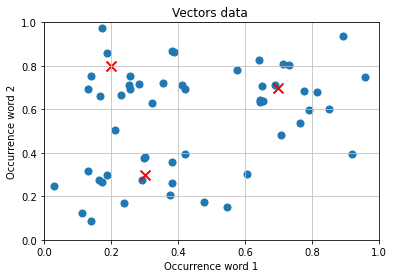

In [ ]:
## generate_data():
centroide=np.array([[0.3,0.3],[0.7,0.7],[0.2,0.8]])
xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)



x = np.append(np.append(xw1, xw2), xw3)
y = np.append(np.append(yw1, yw2), yw3)
plot_clustering(x, y, "Vectors data ")

  #plot the centroid
pylab.scatter(centroide[:, 0], centroide[:, 1],
              marker='x', linewidth=2, s=100, color='red')
#pylab.savefig(os.path.join(CHART_DIR, "1400_03_0%i.png" % i))
  #pylab.close()


Initialization complete
Iteration 0, inertia 3.786002124499096
(1000, 1000)
Initialization complete
Iteration 0, inertia 3.786002124499096
Iteration 1, inertia 2.799614756259052
(1000, 1000)
Initialization complete
Iteration 0, inertia 3.786002124499096
Iteration 1, inertia 2.799614756259052
Iteration 2, inertia 2.730460274798067
(1000, 1000)
Initialization complete
Iteration 0, inertia 3.786002124499096
Iteration 1, inertia 2.799614756259052
Iteration 2, inertia 2.730460274798067
Iteration 3, inertia 2.7230062141311295
Converged at iteration 3: strict convergence.
(1000, 1000)
Initialization complete
Iteration 0, inertia 3.786002124499096
Iteration 1, inertia 2.799614756259052
Iteration 2, inertia 2.730460274798067
Iteration 3, inertia 2.7230062141311295
Converged at iteration 3: strict convergence.
(1000, 1000)
Initialization complete
Iteration 0, inertia 3.786002124499096
Iteration 1, inertia 2.799614756259052
Iteration 2, inertia 2.730460274798067
Iteration 3, inertia 2.72300621413

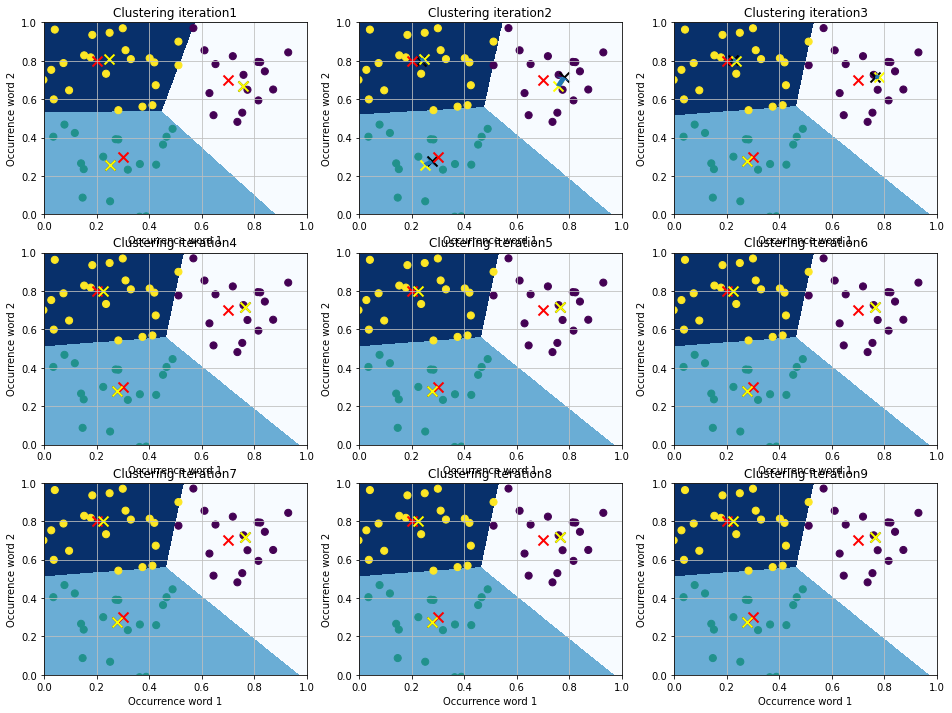

In [ ]:

i = 0

pylab.figure(figsize = (16,12)) # Adjusting figure size
centroidesa=None
for i in range(9):
    pylab.subplot(3,3,i+1)
    centroidesb =cluster(x,y,i+1)
    if centroidesa is None:
       centroidesa=centroidesb 
    pylab.scatter(centroide[:, 0], centroide[:, 1],
              marker='x', linewidth=2, s=100, color='red')
    pylab.scatter(centroidesa[:, 0], centroidesa[:, 1],
              marker='x', linewidth=2, s=100, color='yellow')
    pylab.gca().add_patch(
    
    pylab.Arrow(centroidesa[0][0], centroidesa[0][1], centroidesb[0][0] - centroidesa[0][0], centroidesb[0][1] - centroidesa[0][1], width=0.1))
    pylab.gca().add_patch(
    pylab.Arrow(centroidesa[1][0], centroidesa[1][1], centroidesb[1][0] - centroidesa[1][0], centroidesb[1][1] - centroidesa[1][1], width=0.1))
    pylab.gca().add_patch(
    pylab.Arrow(centroidesa[2][0], centroidesa[2][1], centroidesb[2][0] - centroidesa[2][0], centroidesb[2][1] - centroidesa[2][1], width=0.1))
    centroidesa=centroidesb

pylab.savefig(os.path.join(CHART_DIR, "Ejemplo.png"))
#pylab.close()
          



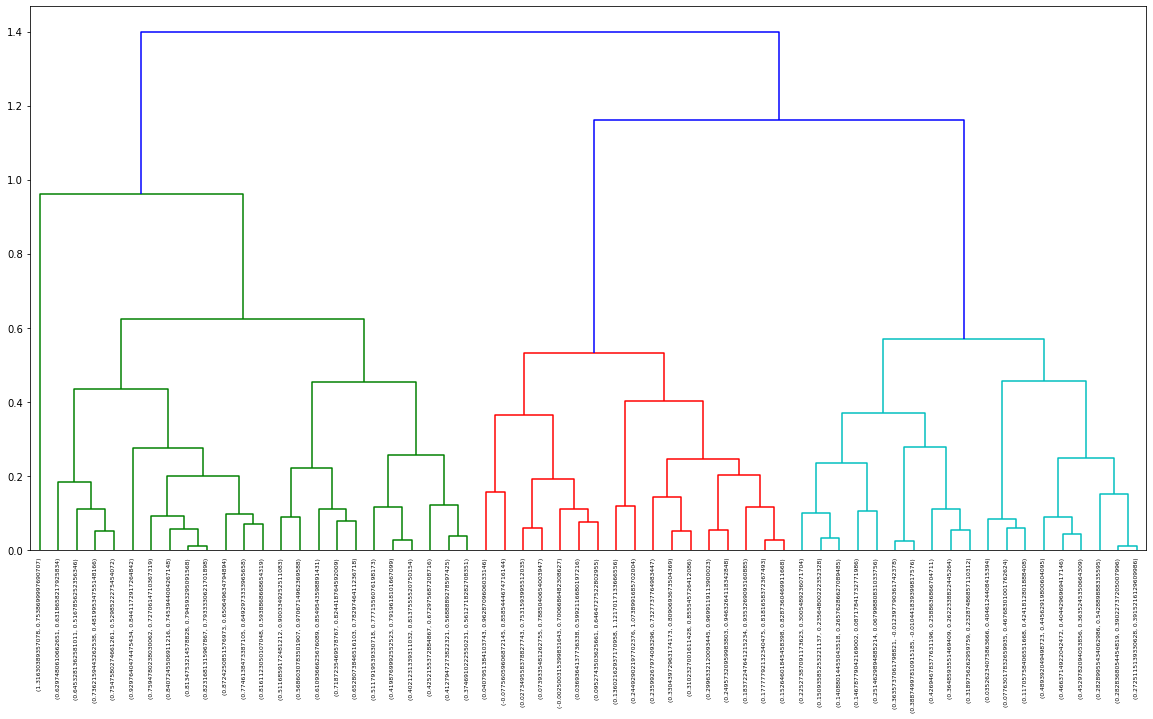

In [ ]:

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
X=list(zip(x, y))
# Algorithm
mergings = linkage(X, method='complete')
# Graph
plt.figure(figsize=(20,10))
dendrogram(mergings,labels=X,
          leaf_rotation=90,leaf_font_size=6)
plt.show()

# Ejemplo cluster herarquico


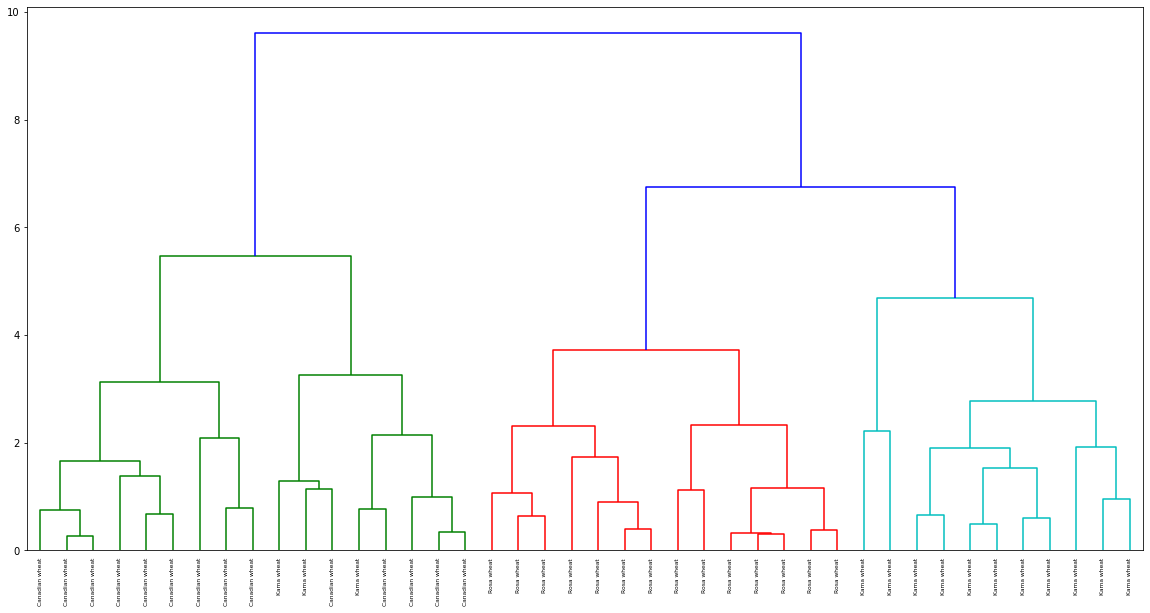

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
seeds_df = pd.read_csv(   "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")
#plants_df =df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vROQTrW6KKNNGK-Cis139acodD1ZqxrJL3mqpmXjLAXAnXDqNGgX915gXj1nnvfftlaojS-AInQ6Ouv/pub?gid=1682168784&single=true&output=csv')
# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))
samples = seeds_df.values
# Algorithm
mergings = linkage(samples, method='complete')
# Graph
plt.figure(figsize=(20,10))
dendrogram(mergings,labels=varieties,
          leaf_rotation=90,leaf_font_size=6)
plt.show()


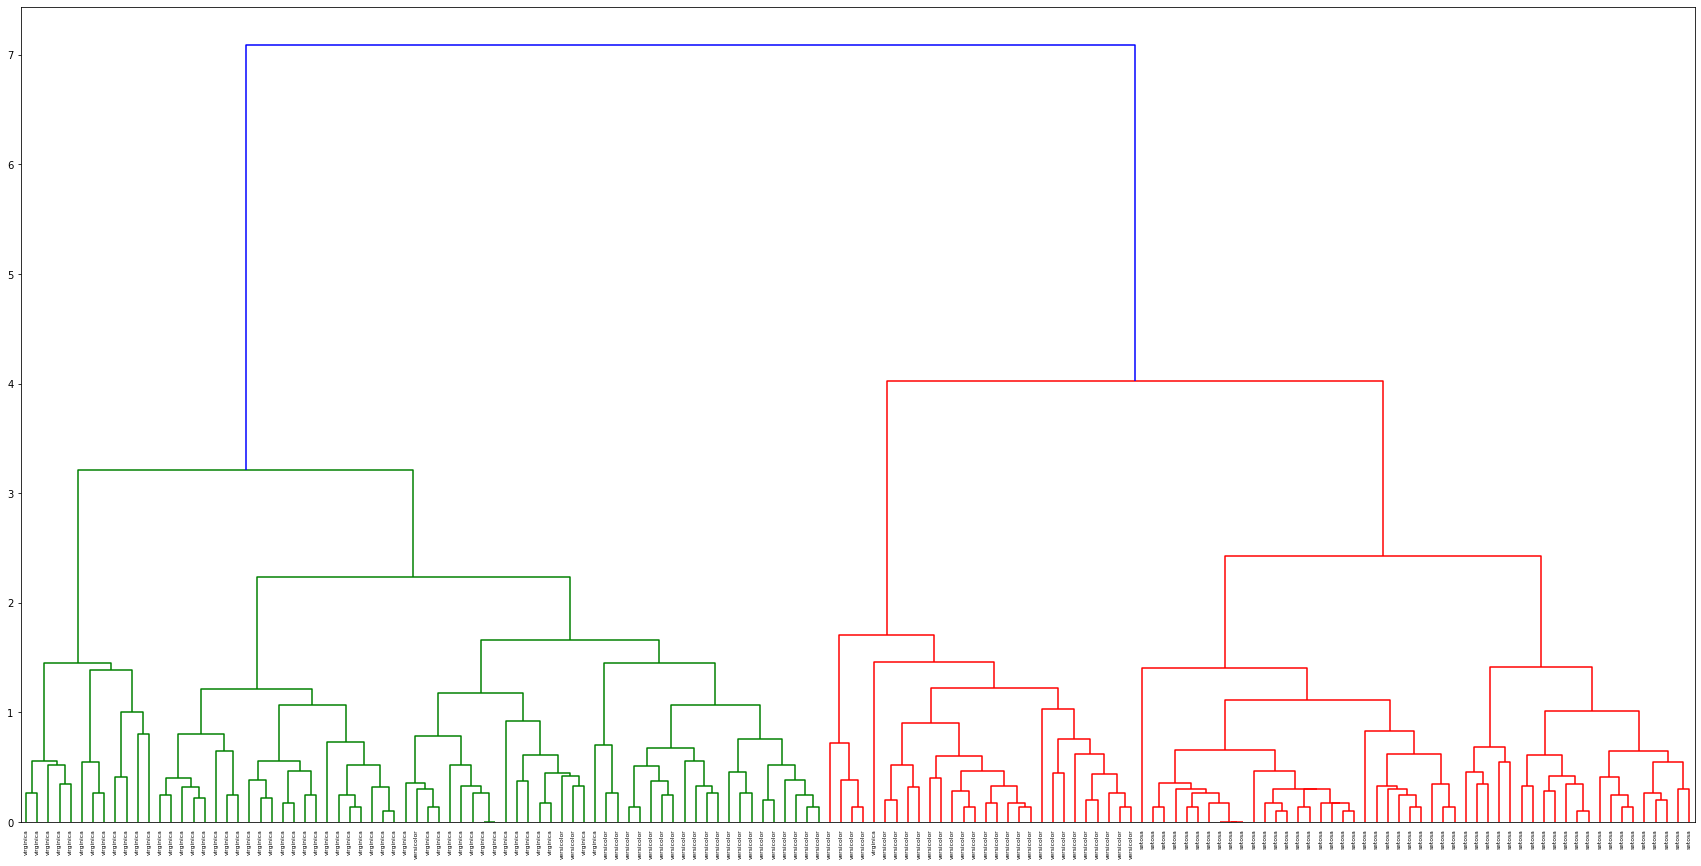

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

plants_df =df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vROQTrW6KKNNGK-Cis139acodD1ZqxrJL3mqpmXjLAXAnXDqNGgX915gXj1nnvfftlaojS-AInQ6Ouv/pub?gid=1682168784&single=true&output=csv')
# Remove the grain species from the DataFrame, save for later
species = list(plants_df.pop('species'))
samples = plants_df.values
# Algorithm
mergings = linkage(samples, method='complete')
# Graph
plt.figure(figsize=(30,15))
dendrogram(mergings,labels=species,
          leaf_rotation=90,leaf_font_size=6)

plt.show()